# Trabajo Practico N° 2 

* Alumnos: Lo Menzo Alejo y Mateo Gravi Fiorino
* Fecha: 29/05/2024
* Profesores: Dr. Ing. Flavio E. Spetale y Ing. Facundo Vasquez
* Materia: Mineria de Datos

despues puntos a mejorar para este trabajo:
* Dividirnos bien que va a hablar cada uno asi no nos pisamos
* Ser mas prolijos sobre las explcaciones de los graficos y codigo
* No psarnos con el tiempo de exposicion

## Ejercicio 1 

Descargar el conjunto de datos, 1000_Companies.csv1, para realizar el trabajo práctico. 
Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de 
datos, etc.) y elegir un método de estandarización.

### Importe de librerías necesarias

In [110]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Carga de dataset

In [34]:
df = pd.read_csv("1000_Companies.csv")
df.head(5)

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [35]:
df['State'] = df['State'].astype('category')

### Graficos

**Distribucion de la variable objetivo 'Profit'**, 
Podemos identificar que es una distribución normal, 
sesgada a la derecha. También comprendemos mejor como se comporta esta variable.

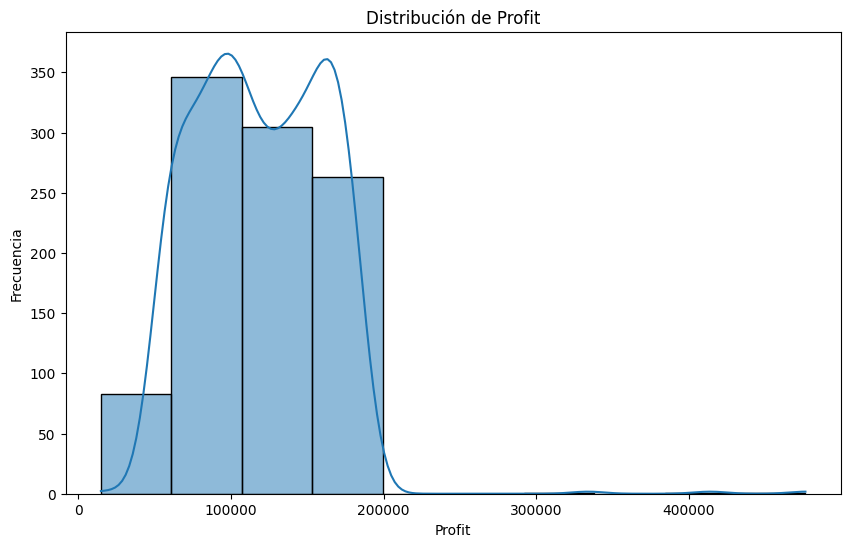

In [8]:
# Histograma de Profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=10, kde=True)
plt.title('Distribución de Profit')
plt.xlabel('Profit')
plt.ylabel('Frecuencia')
plt.show()


**Scatter**


Mostrar la relacion entre dos variables numéricas, en este caso RyD_Spend y Profit
Podemos observar una relacion bastante lineal entre ambas

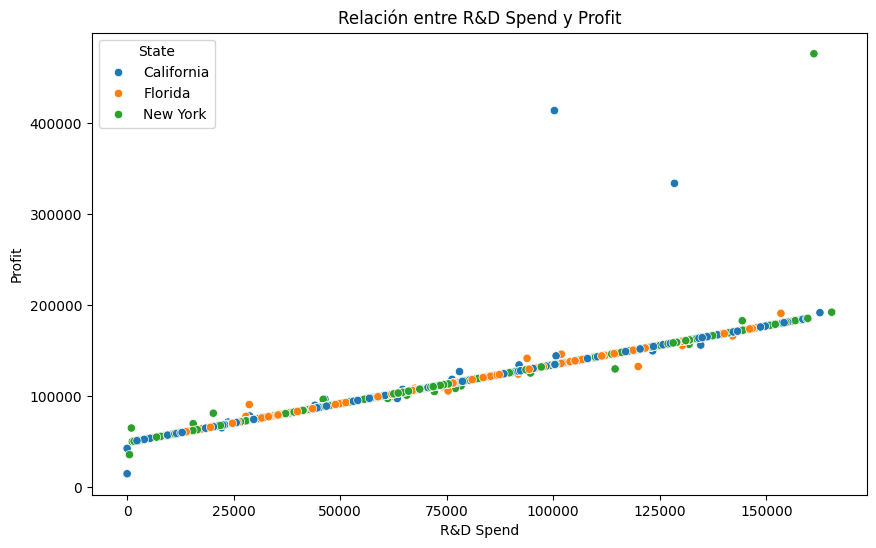

In [9]:
# Scatter plot entre R&D Spend y Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RyD_Spend', y='Profit', data=df, hue='State')
plt.title('Relación entre R&D Spend y Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()


**Boxplot**

No tiene casi valores atípicos con respecto al estado. Entendemos medianas y cuartiles. ¿Vemos una influencia de la ubicacion geografica con la ganancia?

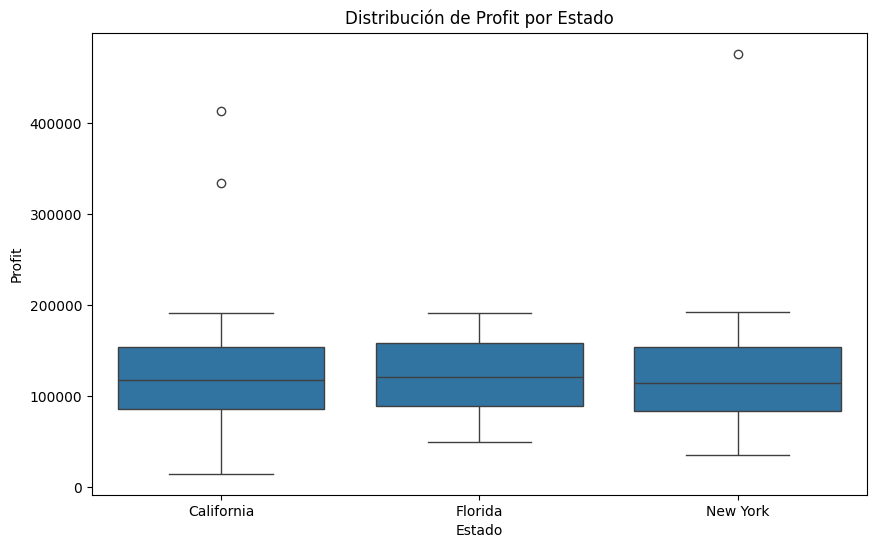

In [10]:
# Boxplot de Profit por Estado
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Profit', data=df)
plt.title('Distribución de Profit por Estado')
plt.xlabel('Estado')
plt.ylabel('Profit')
plt.show()

**Matriz de Correlacion**

Correlación entre variables, donde los colores representan la fuerza de la correlación.
Podemos ver que las correlaciones son muy fuertes.

In [11]:
columns = ['RyD_Spend','Administration','MarketingSpend','Profit']

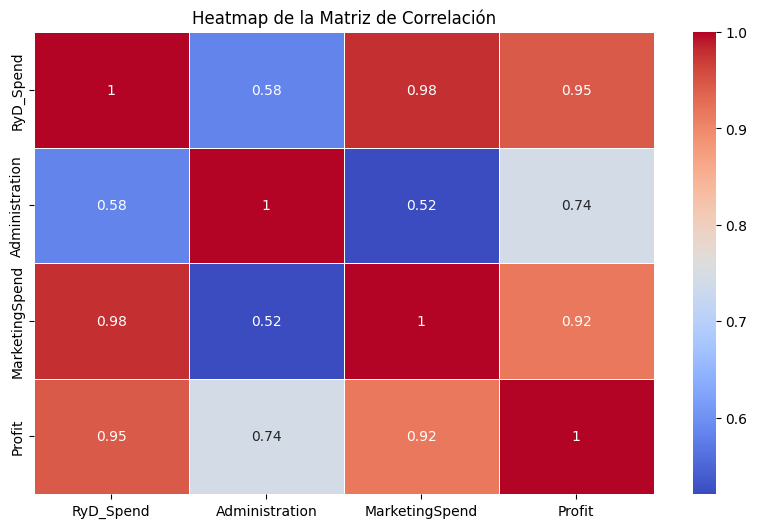

In [12]:
df_corr = df[columns]
# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 6))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RyD_Spend       1000 non-null   float64 
 1   Administration  1000 non-null   float64 
 2   MarketingSpend  1000 non-null   float64 
 3   State           1000 non-null   category
 4   Profit          1000 non-null   float64 
dtypes: category(1), float64(4)
memory usage: 32.5 KB


In [ ]:
# Boxplot por estado para cada variable numérica
for column in df.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='State', y=column, data=df)
    plt.title(f'Distribución de {column} por Estado')
    plt.show()

## Estandarizacion y One Hot Encoding

Importamos librerías necesarias para standarizar

Estandarizamos usando StandarScaler, ajustamos el escalador a los datos y los transformamos.

In [42]:
unique_states = df['State'].unique()
(unique_states)

['New York', 'California', 'Florida']
Categories (3, object): ['California', 'Florida', 'New York']

En este paso, separamos las columnas numéricas y categóricas del DataFrame. La estandarización se aplica solo a las columnas numéricas para asegurar que todas tengan media 0 y desviación estándar 1, lo que es necesario para muchos algoritmos de machine learning. Luego, concatenamos de nuevo las columnas categóricas con las numéricas estandarizadas para obtener el DataFrame final.

- **Separación de Variables**: Dividimos el DataFrame en variables numéricas y categóricas para aplicar transformaciones adecuadas.
- **Estandarización**: Utilizamos `StandardScaler` para estandarizar solo las columnas numéricas.
- **Recombinación**: Concatenamos las columnas categóricas con las numéricas estandarizadas para formar el DataFrame final preparado para el análisis.

In [36]:
# Separar variables numéricas y categóricas
num_cols = df.select_dtypes(include=['float64']).columns
cat_cols = df.select_dtypes(include=['category']).columns

# Solo estandarizamos las columnas numéricas
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

# Concatenar las columnas categóricas de vuelta al DataFrame
df_final = pd.concat([df_scaled, df[cat_cols]], axis=1)

Aplicamos One-Hot Encoding a las columnas categóricas para convertirlas en variables dummy (indicadoras), lo cual es necesario para muchos algoritmos de machine learning que no pueden manejar directamente variables categóricas.

- **One-Hot Encoding**: Utilizamos `ColumnTransformer` y `OneHotEncoder` para transformar las variables categóricas en una serie de columnas binarias (0 o 1).
- **Inclusión de Variables Numéricas**: Configuramos `remainder='passthrough'` para asegurarnos de que las variables numéricas ya estandarizadas se incluyan en el DataFrame transformado sin cambios.
- **Transformación y Reconstrucción del DataFrame**: Aplicamos la transformación y reconstruimos el DataFrame final con las nuevas columnas generadas por el One-Hot Encoding.


In [37]:
# Aplicar One-Hot Encoding solo a las variables categóricas
column_transformer = ColumnTransformer(
    [('ohe', OneHotEncoder(), cat_cols)],
    remainder='passthrough')  # 'passthrough' para incluir las variables numéricas en la transformación

# Aplicar la transformación al DataFrame final
df_encoded = column_transformer.fit_transform(df_final)
df_encoded = pd.DataFrame(df_encoded, columns=column_transformer.get_feature_names_out())

In [39]:
# Remover prefijos de los nombres de las columnas
df_encoded.columns = df_encoded.columns.str.replace('ohe__', '')
df_encoded.columns = df_encoded.columns.str.replace('remainder__', '')

# Ver los nombres de las columnas ajustados
print(df_encoded.columns)

Index(['State_California', 'State_Florida', 'State_New York', 'RyD_Spend',
       'Administration', 'MarketingSpend', 'Profit'],
      dtype='object')


In [40]:
df_encoded

,State_California,State_Florida,State_New York,RyD_Spend,Administration,MarketingSpend,Profit
0,0.0,0.0,1.0,1.799023,1.105197,2.682968,1.696301
1,1.0,0.0,0.0,1.739869,2.253692,2.378316,1.685343
2,0.0,1.0,0.0,1.543022,-1.730568,1.985407,1.668041
3,0.0,0.0,1.0,1.348048,-0.340433,1.715177,1.477956
4,0.0,1.0,0.0,1.299351,-2.504210,1.529110,1.088053
...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,-0.591946,-0.357871,-0.578727,-0.566079
996,1.0,0.0,0.0,1.145907,0.589023,1.125271,1.044865
997,1.0,0.0,0.0,0.400018,9.435756,0.010245,6.867965
998,1.0,0.0,0.0,1.005869,15.759379,0.606202,5.001869


## Ejercicio 2

Implementacion del arbol de Decision Regressor

Preparamos el conjunto de datos para el entrenamiento del modelo separando las variables independientes (X) de la variable dependiente (y), y luego dividimos el conjunto de datos en subconjuntos de entrenamiento y prueba.

- **Separación de Variables**: 
  - `X`: Contiene todas las variables independientes, excluyendo la variable objetivo 'Profit'.
  - `y`: Contiene únicamente la variable objetivo 'Profit'.
- **División en Entrenamiento y Prueba**: Utilizamos `train_test_split` para dividir el conjunto de datos en dos partes:
  - `X_train` y `y_train`: Subconjuntos utilizados para entrenar el modelo.
  - `X_test` y `y_test`: Subconjuntos utilizados para evaluar el rendimiento del modelo.
- **Parámetros de la División**: 
  - `test_size=0.2`: El 20% de los datos se reservan para el conjunto de prueba.
  - `random_state=42`: Se utiliza para asegurar que la división sea reproducible.

In [43]:
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
feature_list = list(X_train.columns)
feature_list

['State_California',
 'State_Florida',
 'State_New York',
 'RyD_Spend',
 'Administration',
 'MarketingSpend']

Entrenamos un modelo de Árbol de Decisión para realizar predicciones sobre la variable objetivo 'Profit'. 

- **Configuración del Modelo**: 
  - Utilizamos `DecisionTreeRegressor` con los siguientes hiperparámetros:
    - `max_depth=6`: La profundidad máxima del árbol es 6, para evitar el sobreajuste.
    - `min_samples_leaf=1`: El número mínimo de muestras requeridas para estar en una hoja es 1.
    - `min_samples_split=2`: El número mínimo de muestras necesarias para dividir un nodo es 2.
    - `random_state=13`: Para asegurar la reproducibilidad del modelo.
- **Entrenamiento del Modelo**: 
  - `regressor_tree = clf.fit(X_train, y_train)`: Entrenamos el modelo utilizando los subconjuntos de entrenamiento.
- **Predicciones**: 
  - `predictions = clf.predict(X_test)`: Utilizamos el modelo entrenado para realizar predicciones sobre el conjunto de prueba.

In [46]:
clf = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=1, min_samples_split=2, random_state=13 )

regressor_tree = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

Rendimiento del modelo de Árbol de Decisión utilizando varias métricas de error.

- **Cálculo de Métricas**:
  - `mean_absolute_error (MAE)`: Calcula el promedio de los errores absolutos entre las predicciones y los valores reales.
  - `mean_squared_error (MSE)`: Calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales.
  - `root_mean_squared_error (RMSE)`: Calcula la raíz cuadrada del MSE, proporcionando una métrica en la misma escala que los datos originales.
- **Impresión de Resultados**:
  - Se imprimen los valores de MAE, MSE y RMSE para interpretar el rendimiento del modelo.

Estas métricas nos permiten evaluar cuán precisas son las predicciones del modelo y entender mejor los errores cometidos.

In [47]:
# Métricas
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Error Absoluto Medio:", mae)
print("Error Cuadrático Medio:", mse)
print("Raíz del Error Cuadrático Medio:", rmse)

Error Absoluto Medio: 0.03701589045254685
Error Cuadrático Medio: 0.01876240821928287
Raíz del Error Cuadrático Medio: 0.13697594029347954


Visualizamos el modelo de Árbol de Decisión entrenado para entender mejor cómo realiza las predicciones.

- **Visualización del Árbol**:
  - Utilizamos `plot_tree` para graficar el árbol de decisión.
  - `filled=True`: Colorea los nodos del árbol según la predicción de la clase.
  - `feature_names=X.columns.tolist() + ['State_New York', 'State_California', 'State_Florida']`: Etiqueta cada nodo con el nombre de la característica correspondiente.

- **Interpretación del Árbol de Decisión**:
  - **Raíz del Árbol**: El nodo superior es el nodo raíz que contiene toda la muestra de datos. La característica y el valor de división aquí tienen el mayor poder predictivo.
  - **Nodos Internos**: Cada nodo interno representa una característica y un punto de división. Muestra la condición que se evalúa para dividir los datos en dos ramas.
  - **Hojas**: Los nodos hoja representan el valor de predicción final. Cada hoja muestra el valor promedio de la variable objetivo para los datos que llegan a esa hoja.
  - **Profundidad del Árbol**: La profundidad de los nodos indica el nivel de decisión. Un árbol más profundo puede capturar más detalles, pero también puede llevar a un sobreajuste.

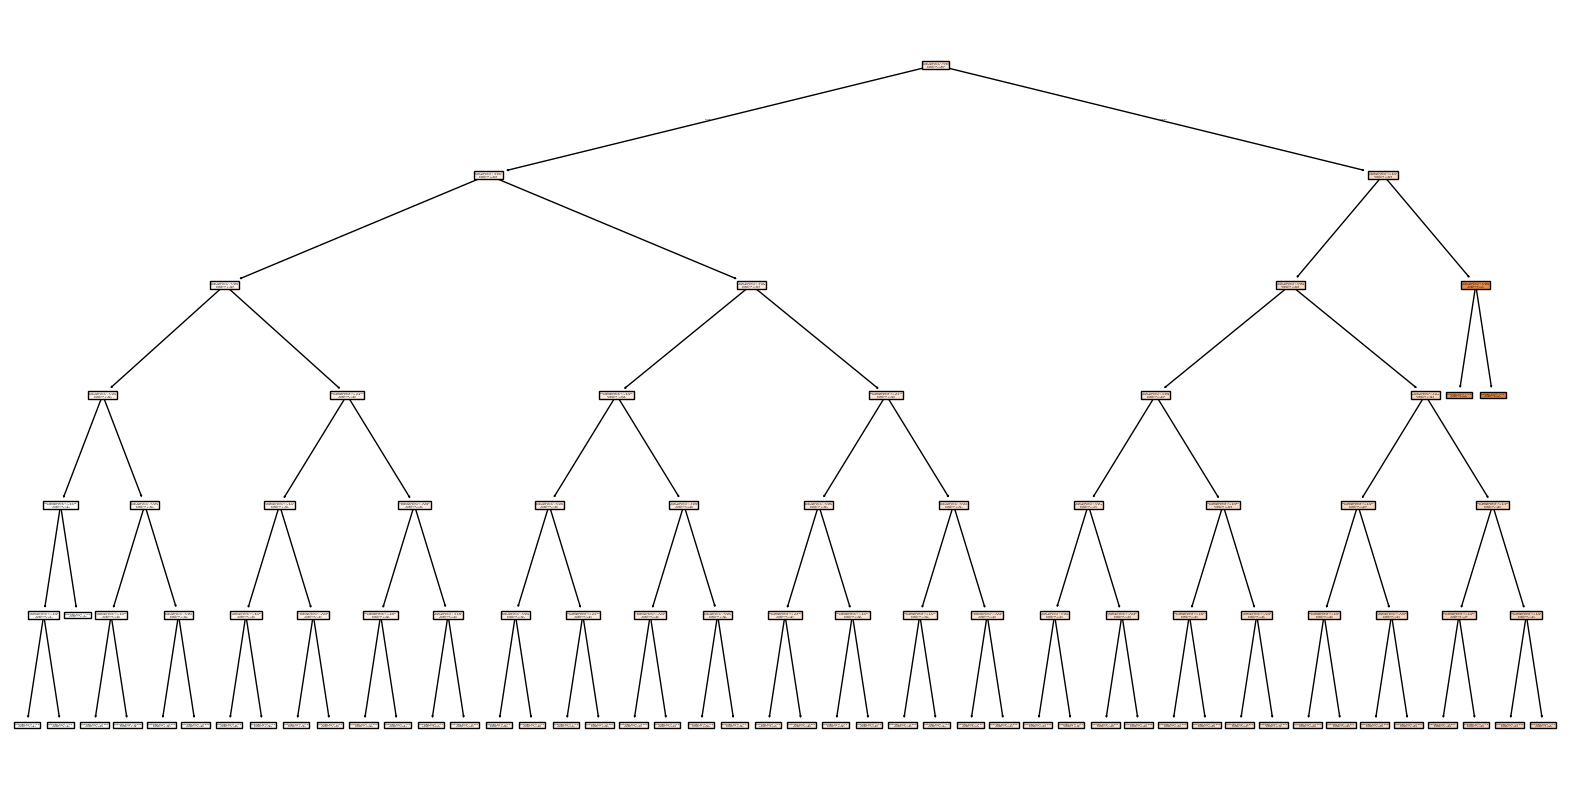

In [49]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist() + ['State_New York', 'State_California', 'State_Florida'])
plt.show()

## Ejercicio 3

Descargar el conjunto de datos, PokemonDB.csv2, para realizar el trabajo práctico. 
Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de 
datos, etc.)

### Carga del dataset

In [76]:
df_pkm = pd.read_csv("PokemonDB.csv")
df_pkm

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,55,80,80,135,120,100
1186,Roaring Moon,Dragon,105,139,71,55,101,119
1187,Iron Valiant,Fairy,74,130,90,120,60,116
1188,Koraidon,Fighting,100,135,115,85,100,135


### EDA

In [52]:
df_pkm.describe() # Medidas básicas del dataset

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [53]:
df_pkm.info() # Comprobamos los nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


In [77]:
df_pkm['Name'] = df_pkm['Name'].astype('category')
df_pkm['Type'] = df_pkm['Type'].astype('category')

### Graficos

**Histogramas de las diferentes variables**

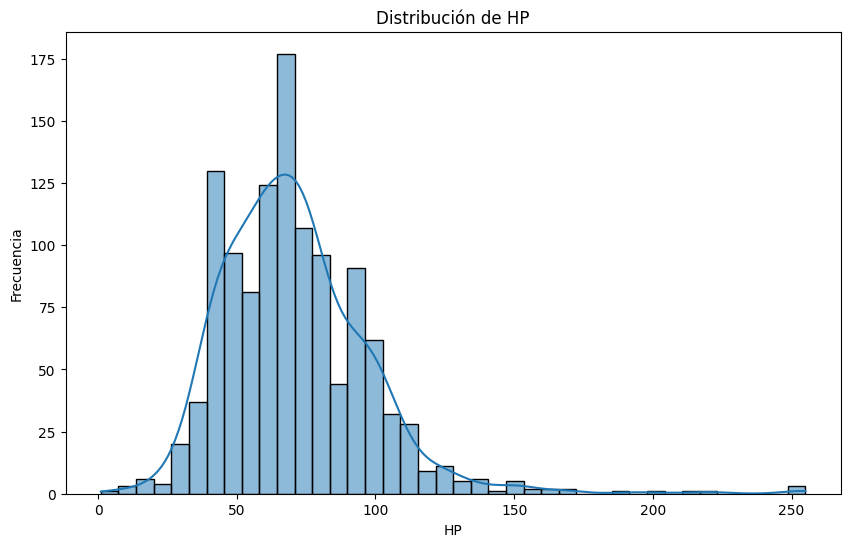

In [56]:
# Histograma de HP
plt.figure(figsize=(10, 6))
sns.histplot(df_pkm['HP'], kde=True)
plt.title('Distribución de HP')
plt.xlabel('HP')
plt.ylabel('Frecuencia')
plt.show()


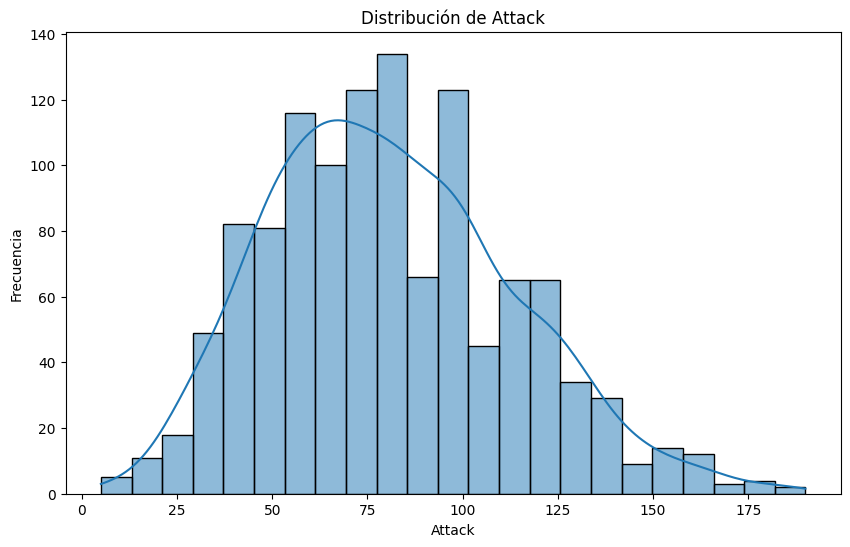

In [57]:
# Histograma de Attack
plt.figure(figsize=(10, 6))
sns.histplot(df_pkm['Attack'], kde=True)
plt.title('Distribución de Attack')
plt.xlabel('Attack')
plt.ylabel('Frecuencia')
plt.show()


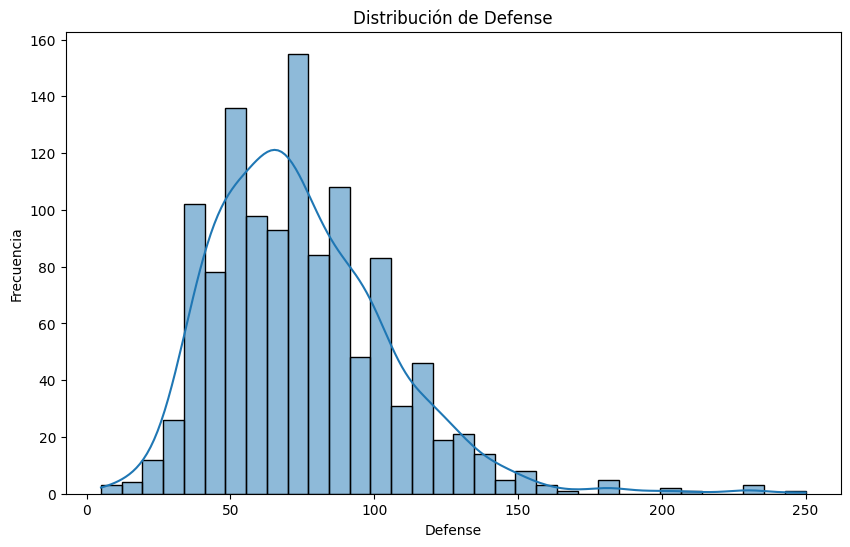

In [58]:
# Histograma de Defense
plt.figure(figsize=(10, 6))
sns.histplot(df_pkm['Defense'], kde=True)
plt.title('Distribución de Defense')
plt.xlabel('Defense')
plt.ylabel('Frecuencia')
plt.show()


**Boxplots de estadisticas de batalla**

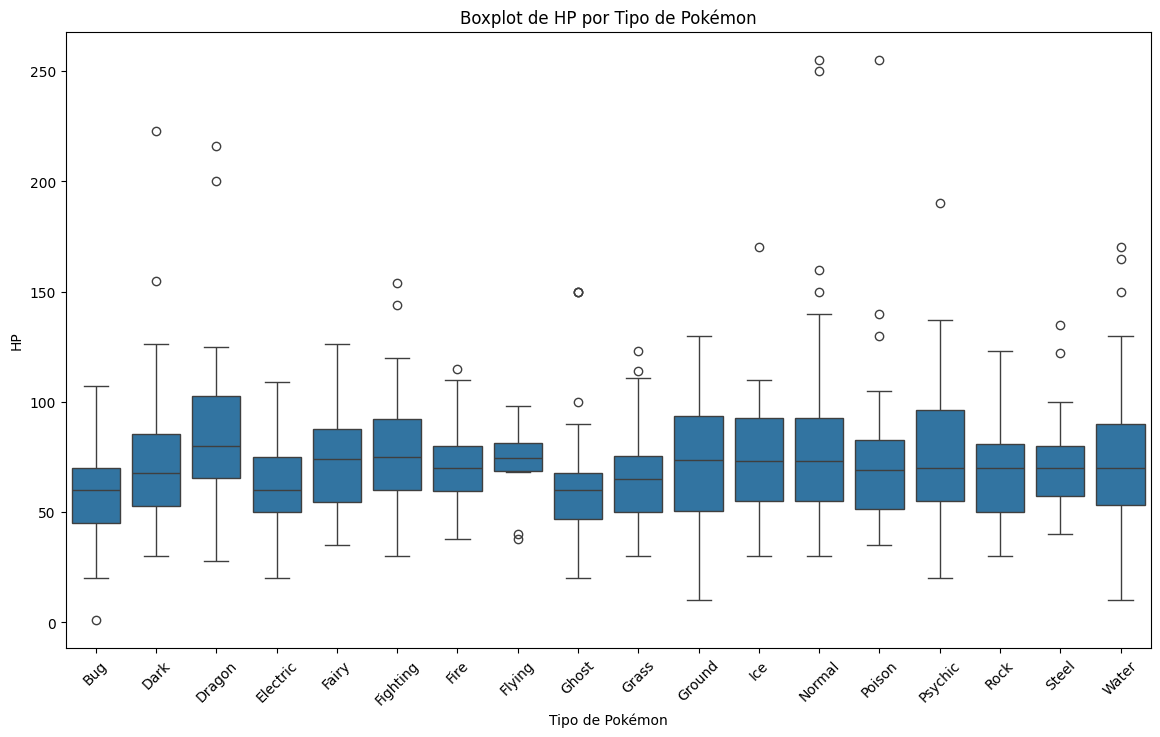

In [59]:
# Boxplot de HP por Tipo de Pokémon
plt.figure(figsize=(14, 8))
sns.boxplot(x='Type', y='HP', data=df_pkm)
plt.title('Boxplot de HP por Tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('HP')
plt.xticks(rotation=45)
plt.show()


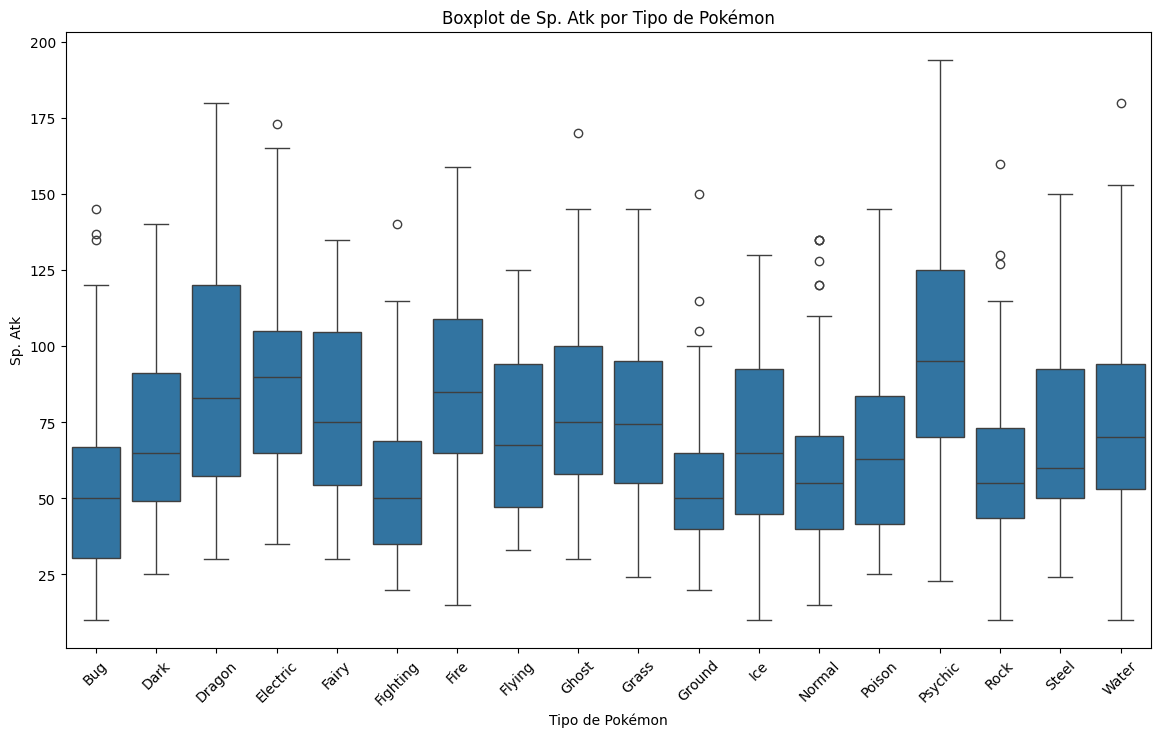

In [60]:
# Boxplot de Sp. Atk por Tipo de Pokémon
plt.figure(figsize=(14, 8))
sns.boxplot(x='Type', y='Sp. Atk', data=df_pkm)
plt.title('Boxplot de Sp. Atk por Tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Sp. Atk')
plt.xticks(rotation=45)
plt.show()

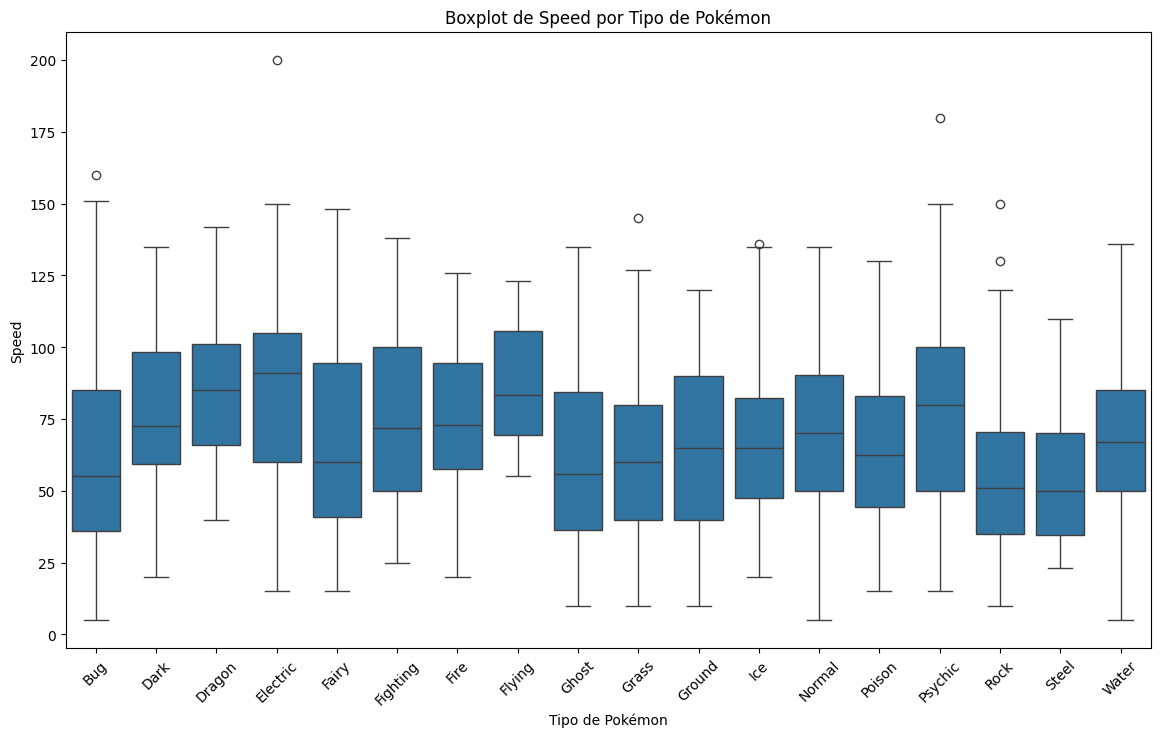

In [61]:
# Boxplot de Speed por Tipo de Pokémon
plt.figure(figsize=(14, 8))
sns.boxplot(x='Type', y='Speed', data=df_pkm)
plt.title('Boxplot de Speed por Tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Speed')
plt.xticks(rotation=45)
plt.show()


**Scatterplot**

Podemos obervar como se relaciona el ataque con la defensa segun el tipo del pokemon

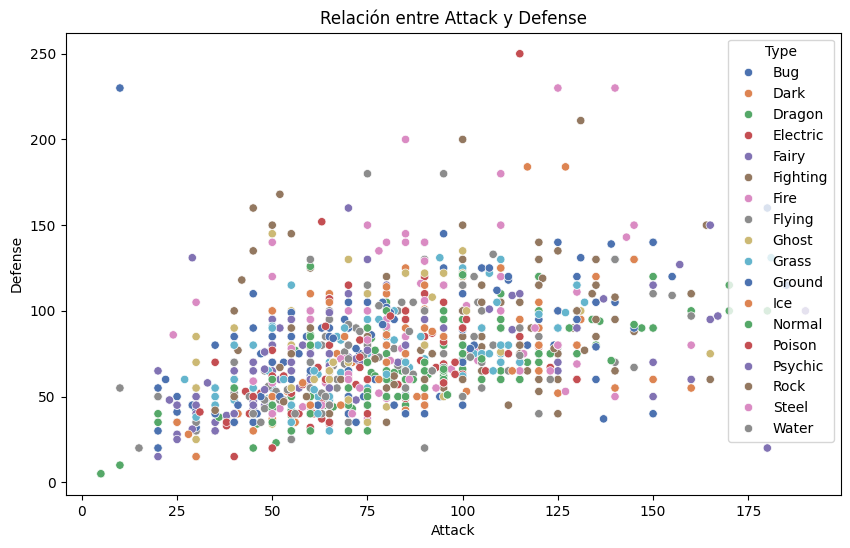

In [62]:
# Scatter plot entre Attack y Defense
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attack', y='Defense', data=df_pkm, hue='Type', palette='deep')
plt.title('Relación entre Attack y Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(title='Type')
plt.show()

**Matriz de correlacion**

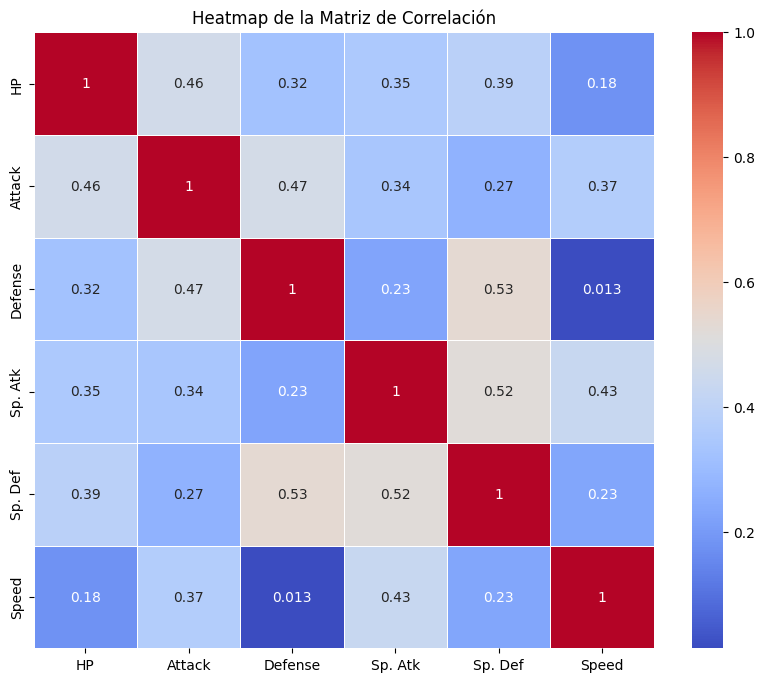

In [63]:
# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df_pkm[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()


In [71]:
df_pkm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Name     1190 non-null   category
 1   Type     1190 non-null   category
 2   HP       1190 non-null   int64   
 3   Attack   1190 non-null   int64   
 4   Defense  1190 non-null   int64   
 5   Sp. Atk  1190 non-null   int64   
 6   Sp. Def  1190 non-null   int64   
 7   Speed    1190 non-null   int64   
dtypes: category(2), int64(6)
memory usage: 100.2 KB


# Ejercicio 4

Realizar la estimación del atributo Type utilizando Bayes Ingenuo. Aquí deberá 
considerar un criterio de división de los atributos para discretizarlos. Mostrar los 
resultados sobre dos conjuntos de test (Precisión, Exhaustividad y Exactitud).

In [ ]:
df_pkm

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,55,80,80,135,120,100
1186,Roaring Moon,Dragon,105,139,71,55,101,119
1187,Iron Valiant,Fairy,74,130,90,120,60,116
1188,Koraidon,Fighting,100,135,115,85,100,135


En este paso, discretizamos las variables numéricas del conjunto de datos y preparamos los datos para entrenar un modelo Naive Bayes.

- **Selección de Columnas Numéricas**:
  - `num_cols`: Especificamos las columnas numéricas que serán discretizadas. Estas incluyen 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', y 'Speed'.
- **Discretización de Variables Numéricas**:
  - Utilizamos `KBinsDiscretizer` para convertir las variables numéricas en categorías. Esto es útil para algoritmos como Naive Bayes que funcionan mejor con datos categóricos.
  - `n_bins=5`: Dividimos cada variable en 5 bins (categorías).
  - `encode='ordinal'`: Codificamos las categorías como valores ordinales (0, 1, 2, 3, 4).
  - `strategy='uniform'`: Dividimos los datos en bins de igual tamaño.
- **Aplicación del Discretizador**:
  - `df_pkm[num_cols] = discretizer.fit_transform(df_pkm[num_cols])`: Aplicamos la discretización a las columnas numéricas del DataFrame.
- **Separación de Características y Etiquetas**:
  - `X_bayes`: Contiene todas las características, excluyendo la variable objetivo 'Type'.
  - `y_bayes`: Contiene únicamente la variable objetivo 'Type'.
- **División en Conjuntos de Entrenamiento y Prueba**:
  - Utilizamos `train_test_split` para dividir los datos en conjuntos de entrenamiento y prueba.
  - `test_size=0.2`: El 20% de los datos se reservan para el conjunto de prueba.
  - `random_state=42`: Para asegurar la reproducibilidad de la división.


In [ ]:
# Columnas numéricas
num_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Discretización
# Usaremos KBinsDiscretizer para convertir las variables numéricas en categorías
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# discretizador
df_pkm[num_cols] = discretizer.fit_transform(df_pkm[num_cols])

# datos en características y etiquetas
X_bayes = df_pkm.drop('Type', axis=1)
y_bayes = df_pkm['Type']

# datos en entrenamiento y prueba
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X_bayes, y_bayes, test_size=0.2, random_state=42)

Creamos un pipeline que incluye el preprocesamiento de las variables categóricas y el entrenamiento de un clasificador Naive Bayes.

- **Preprocesamiento de Variables Categóricas**:
  - Utilizamos `ColumnTransformer` para aplicar `OneHotEncoder` a todas las columnas de características.
  - `handle_unknown='ignore'`: Ignoramos cualquier valor desconocido durante la transformación.
  - `X.columns`: Aplicamos One-Hot Encoding a todas las columnas de características.

- **Creación del Pipeline**:
  - `Pipeline` nos permite encadenar múltiples pasos de preprocesamiento y modelado en una sola operación.
  - `('preprocessor', preprocessor)`: Primer paso del pipeline, que aplica el preprocesamiento definido anteriormente.
  - `('classifier', MultinomialNB())`: Segundo paso del pipeline, que entrena un clasificador Naive Bayes multinomial.

- **Entrenamiento del Modelo**:
  - `pipeline.fit(X_train_bayes, y_train_bayes)`: Entrenamos el modelo Naive Bayes utilizando el conjunto de entrenamiento preprocesado.

In [ ]:
# Preprocesamiento para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('', OneHotEncoder(handle_unknown='ignore'), X.columns)  # Aplicar OneHot a todas las columnas
    ])

# Pipeline con preprocesamiento y clasificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

# Entrenamiento del modelo
pipeline.fit(X_train_bayes, y_train_bayes)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object'))])),
                ('classifier', MultinomialNB())])

Modelo Naive Bayes entrenado para realizar predicciones sobre el conjunto de prueba y calculamos varias métricas para evaluar su rendimiento.

- **Predicciones**:
  - `y_pred_bayes = pipeline.predict(X_test_bayes)`: Utilizamos el pipeline entrenado para predecir las etiquetas del conjunto de prueba.

- **Cálculo de Métricas**:
  - `precision_score`: Calcula la precisión del modelo, que es la proporción de verdaderos positivos sobre todos los positivos predichos.
  - `recall_score`: Calcula la exhaustividad (recall), que es la proporción de verdaderos positivos sobre todos los verdaderos positivos reales.
  - `accuracy_score`: Calcula la exactitud (accuracy), que es la proporción de predicciones correctas sobre el total de predicciones.
  - `average='macro'`: Calcula la métrica para cada etiqueta y luego encuentra su media no ponderada. Esto trata todas las clases por igual.
  - `zero_division=0`: Evita divisiones por cero al calcular las métricas.

- **Impresión de Resultados**:
  - Se imprimen los valores de precisión, exhaustividad y exactitud para interpretar el rendimiento del modelo.

Estas métricas nos proporcionan una evaluación integral del rendimiento del modelo en términos de precisión, exhaustividad y exactitud.

In [ ]:
# Predicciones
y_pred_bayes = pipeline.predict(X_test_bayes)

# Cálculo de métricas
precision = precision_score(y_test_bayes, y_pred_bayes, average='macro', zero_division=0)
recall = recall_score(y_test_bayes, y_pred_bayes, average='macro', zero_division=0)
accuracy = accuracy_score(y_test_bayes, y_pred_bayes)

print(f'Precisión: {precision}, Exhaustividad: {recall}, Exactitud: {accuracy}')


Precisión: 0.07187810749986917, Exhaustividad: 0.07693151179741219, Exactitud: 0.15966386554621848


c:\Users\Usuario\Documents\5TO CUATRIMESTRE\data_mining\DataMining-2\data_mining\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Realizar la estimación del atributo Type utilizando árboles de decisión (Clasificación) 
analizando los parámetros máximo profundidad, número mínimo de observaciones, 
número mínimo de observaciones por separación y criterio de separación. 

Graficar el árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos 
conjuntos de test (Precisión, Exhaustividad y Exactitud).  

Decidimos dejar dos soluciones distintas para este ejercicio. Podemos observar distintas accuracy. Fuimos probando diferentes enfoques, si bien uno "da mejor" que otro, decidimos dejar ambos ya que nos fueron útiles para aprender.

## Solucion 1

Preparamos los datos para un problema de clasificación de Pokémon, donde intentamos predecir el tipo de Pokémon basado en diversas características.

- **Separación de Características y Etiquetas**:
  - `X`: Contiene todas las características, excluyendo la variable objetivo 'Type'.
  - `y`: Contiene únicamente la variable objetivo 'Type'.
  
- **Preprocesamiento de Variables Categóricas**:
  - `column_transformer_pkm`: Utilizamos `ColumnTransformer` para aplicar `OneHotEncoder` a la columna 'Name', que contiene el nombre de los Pokémon.
  - `handle_unknown='ignore'`: Ignora cualquier valor desconocido durante la transformación.
  - `remainder='passthrough'`: Conserva todas las columnas que no se transforman, permitiendo que otras características pasen sin cambios.
  
- **División en Conjuntos de Entrenamiento y Prueba**:
  - Utilizamos `train_test_split` para dividir los datos en conjuntos de entrenamiento y prueba.
  - `test_size=0.2`: El 20% de los datos se reservan para el conjunto de prueba.
  - `random_state=42`: Para asegurar la reproducibilidad de la división.

In [78]:
X = df_pkm.drop('Type', axis=1)
y = df_pkm['Type']

# 
column_transformer_pkm = ColumnTransformer(
    transformers=[
        (' ', OneHotEncoder(handle_unknown='ignore'), ['Name'])],
    remainder='passthrough')

# Datos en entrenamiento y prueba
X_train_pkm, X_test_pkm, y_train_pkm, y_test_pkm = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Pipeline para preprocesamiento y modelado
pipeline = Pipeline(steps=[('preprocessor', column_transformer_pkm),
                           ('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=10, criterion='entropy'))])

# Entrenar el modelo
pipeline.fit(X_train_pkm, y_train_pkm)


c:\Users\Usuario\Documents\5TO CUATRIMESTRE\data_mining\DataMining-2\data_mining\lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[(' ',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Name'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10,
                                        min_samples_split=20))])

In [80]:
# Predicciones
y_pred_pkm = pipeline.predict(X_test_pkm)

# Métricas de evaluación
precision = precision_score(y_test_pkm, y_pred_pkm, average='macro', zero_division=0)
recall = recall_score(y_test_pkm, y_pred_pkm, average='macro', zero_division=0)
accuracy = accuracy_score(y_test_pkm, y_pred_pkm)

print(f'Precisión: {precision}, Exhaustividad: {recall}, Exactitud: {accuracy}')


Precisión: 0.12792246042721214, Exhaustividad: 0.1414905412052672, Exactitud: 0.18907563025210083


c:\Users\Usuario\Documents\5TO CUATRIMESTRE\data_mining\DataMining-2\data_mining\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


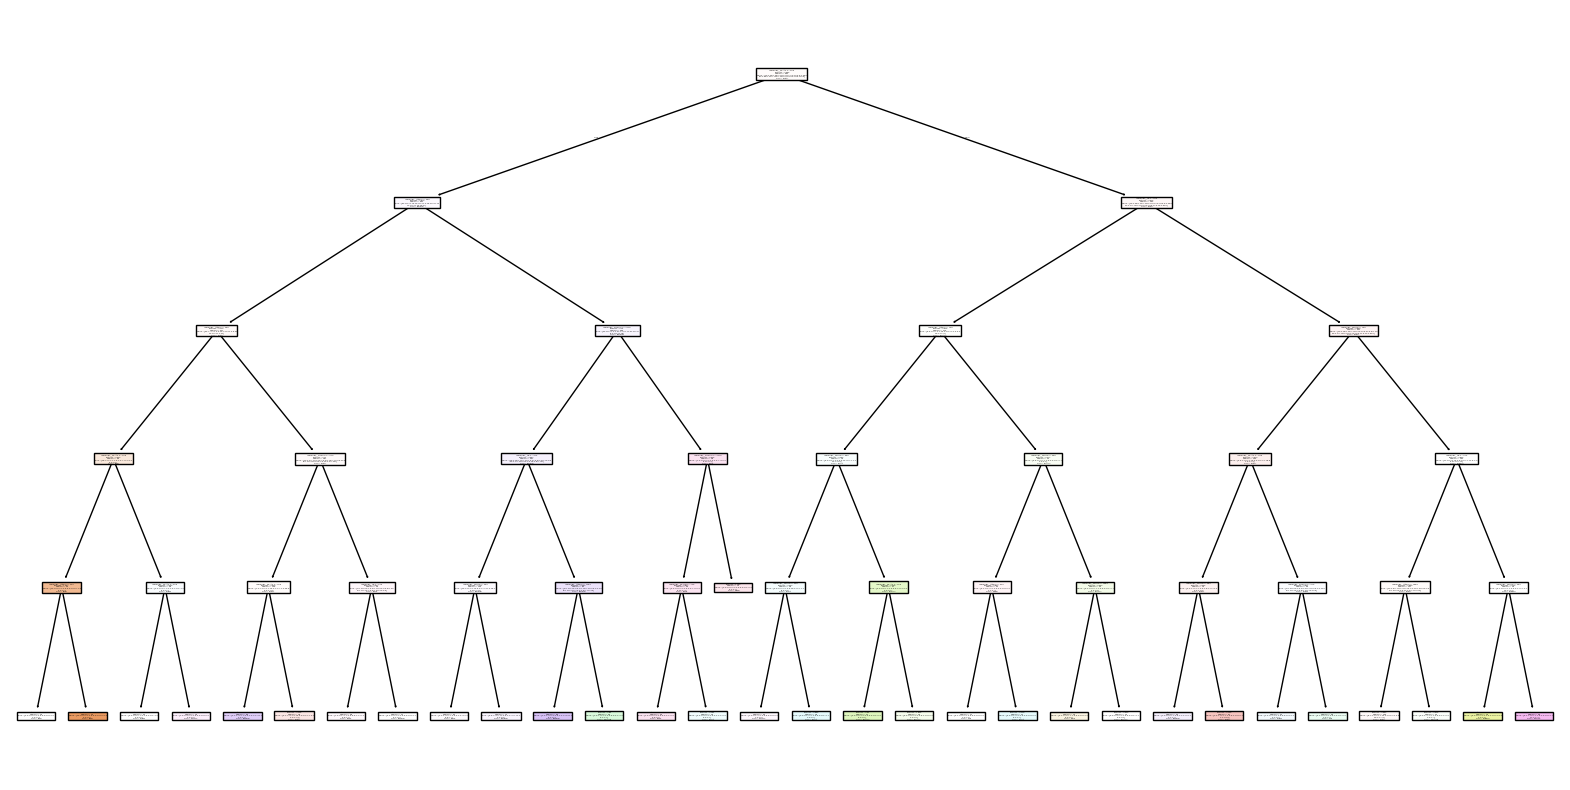

In [81]:
decision_tree = pipeline.named_steps['classifier']

plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out(), class_names=decision_tree.classes_)
plt.show()

## Solucion 2

Preparamos los datos para un problema de clasificación de Pokémon, donde intentamos predecir el tipo de Pokémon basado en diversas características.

- **Separación de Características y Etiquetas**:
  - `X`: Contiene todas las características, excluyendo la variable objetivo 'Type'.
  - `y`: Contiene únicamente la variable objetivo 'Type'.
  
- **Preprocesamiento de Variables Categóricas**:
  - `column_transformer_pkm`: Utilizamos `ColumnTransformer` para aplicar `OneHotEncoder` a la columna 'Name', que contiene el nombre de los Pokémon.
  - `handle_unknown='ignore'`: Ignora cualquier valor desconocido durante la transformación.
  - `remainder='passthrough'`: Conserva todas las columnas que no se transforman, permitiendo que otras características pasen sin cambios.
  
- **División en Conjuntos de Entrenamiento y Prueba**:
  - Utilizamos `train_test_split` para dividir los datos en conjuntos de entrenamiento y prueba.
  - `test_size=0.2`: El 20% de los datos se reservan para el conjunto de prueba.
  - `random_state=42`: Para asegurar la reproducibilidad de la división.

### Split

In [177]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_pkm = df_pkm[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y_pkm = df_pkm['Type']
X_train_pkm, X_test_pkm, y_train_pkm, y_test_pkm = train_test_split(X_pkm, y_pkm, test_size=0.2, random_state=42)

### Parámetros de arboles de decision

¿Cómo construimos el  árbol y como lo regularizamos para evitar el sobre ajuste? 

'max_depth', es la profundidad maxima del arbol, elegimos una profundidad de 3, 5 y 7.

'min_samples_split' refiere al numero minimo de muestras requeridas para dividir un nodo interno. Si el numero de muestras en menor el nodo no se dividira y se convierte en hoja.

'min_samples_leaf' denota el numero de muestras necesarias para ser una hoja, un valor más alto puede suavizar el modelo

In [178]:
# Diferentes configuraciones de árboles de decisión
parameters = [
    {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'},
    {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'entropy'},
    {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 3, 'criterion': 'gini'}
]

### Arbol

Modelo 1 - Parámetros: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}


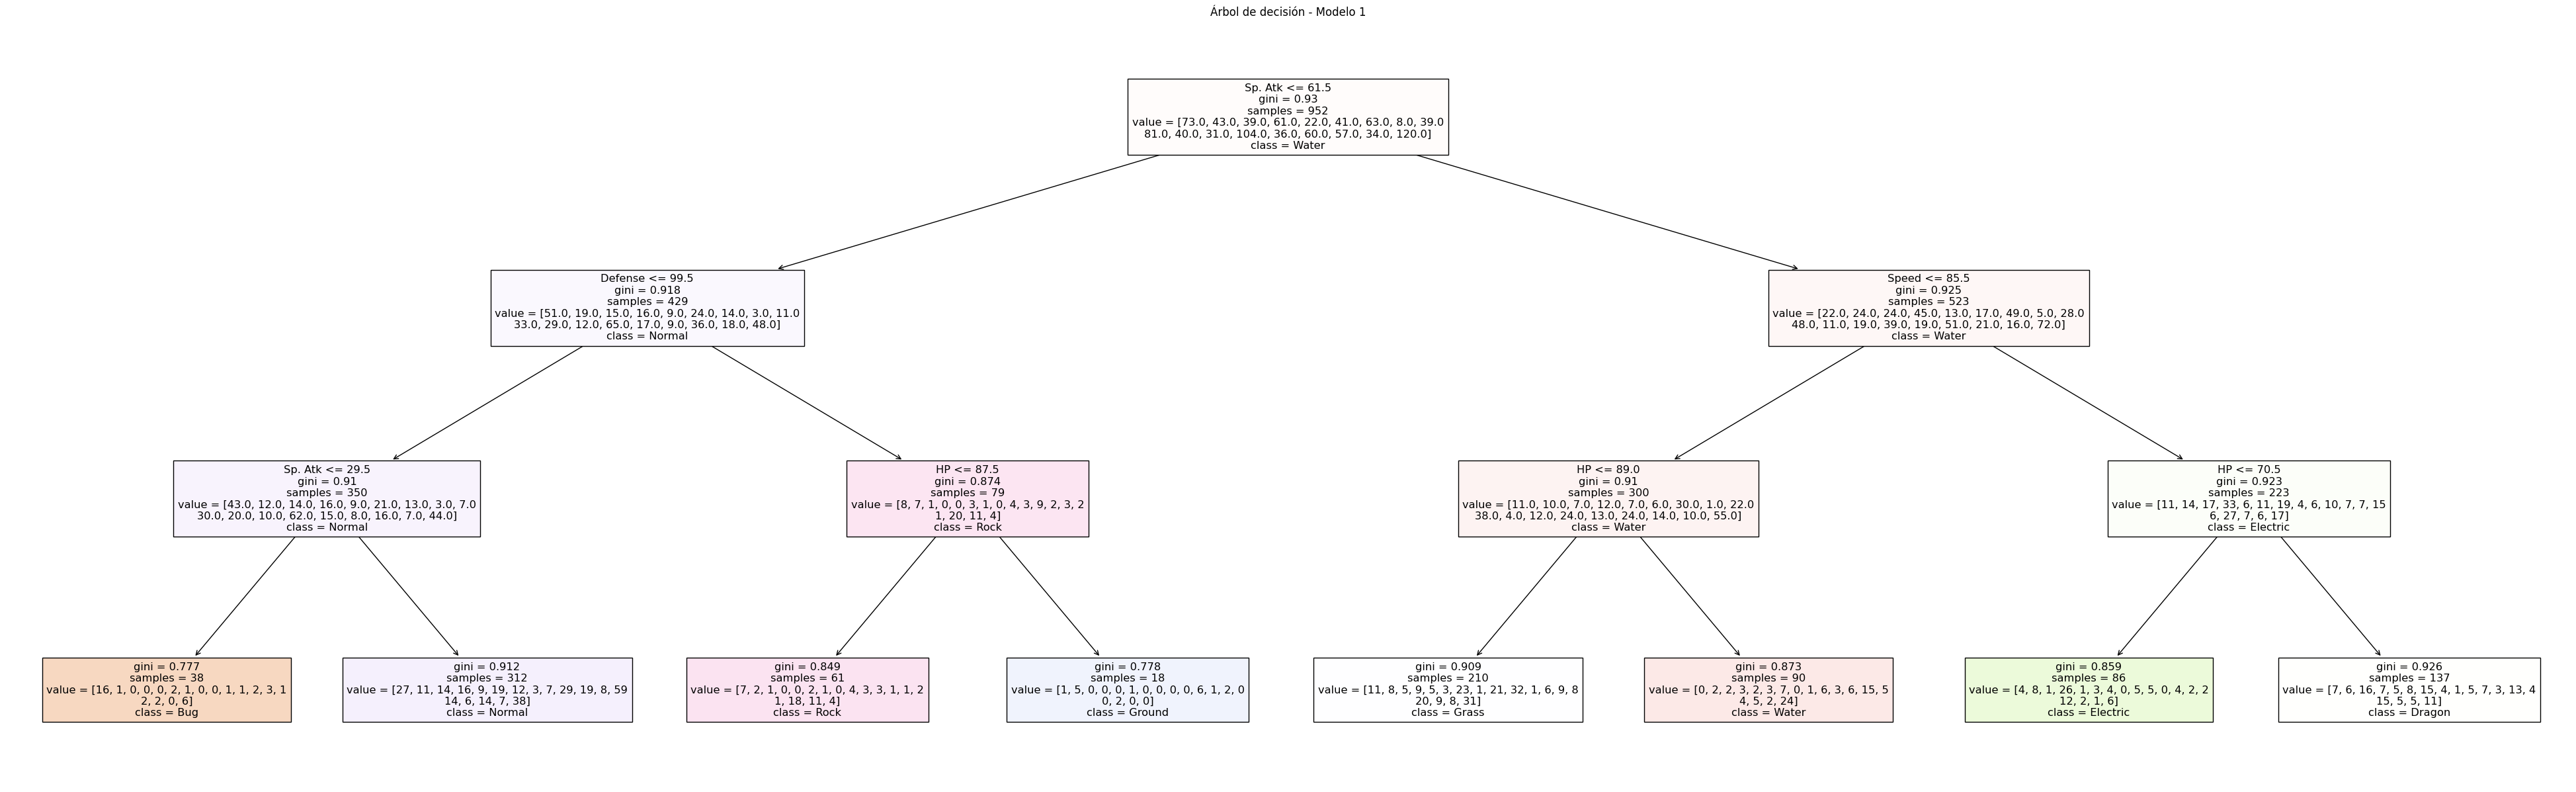

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.1639
Precision: 0.1039
Recall: 0.1639


Modelo 2 - Parámetros: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'entropy'}


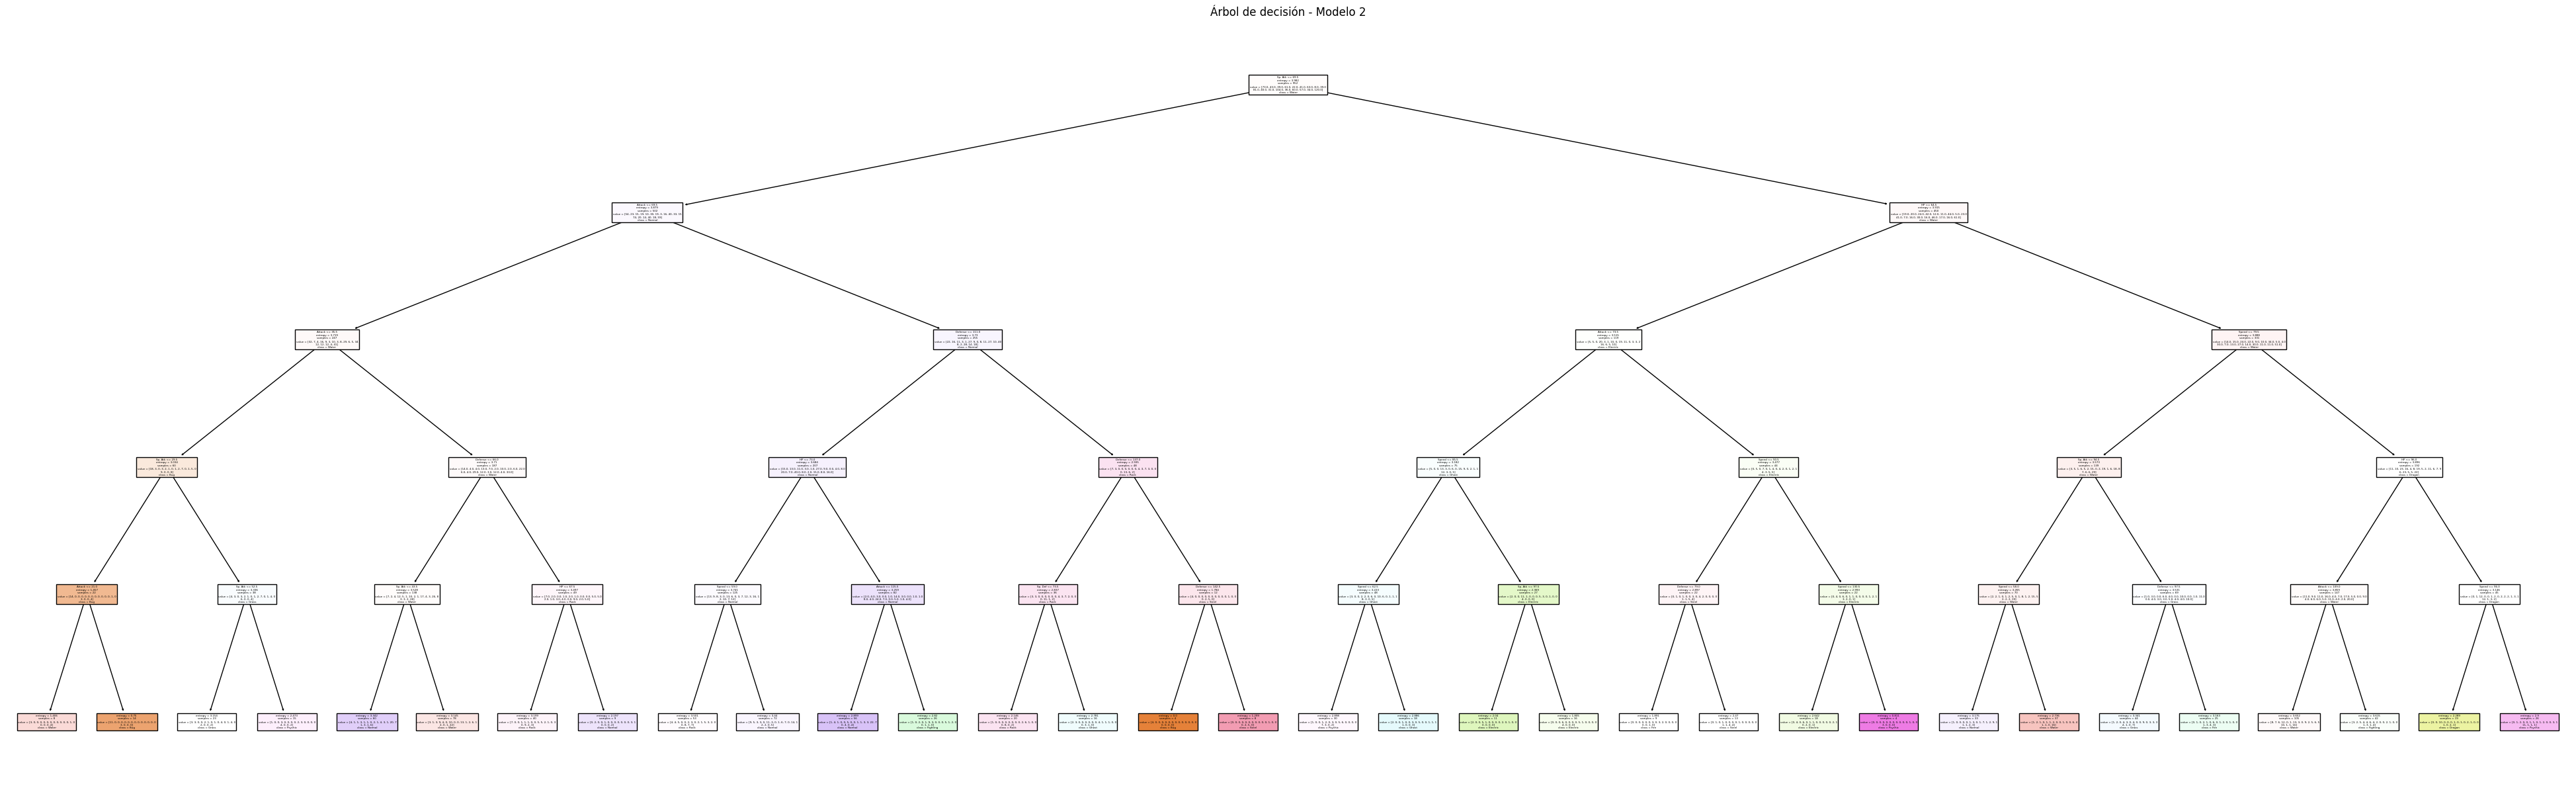

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.1765
Precision: 0.1320
Recall: 0.1765


Modelo 3 - Parámetros: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 3, 'criterion': 'gini'}


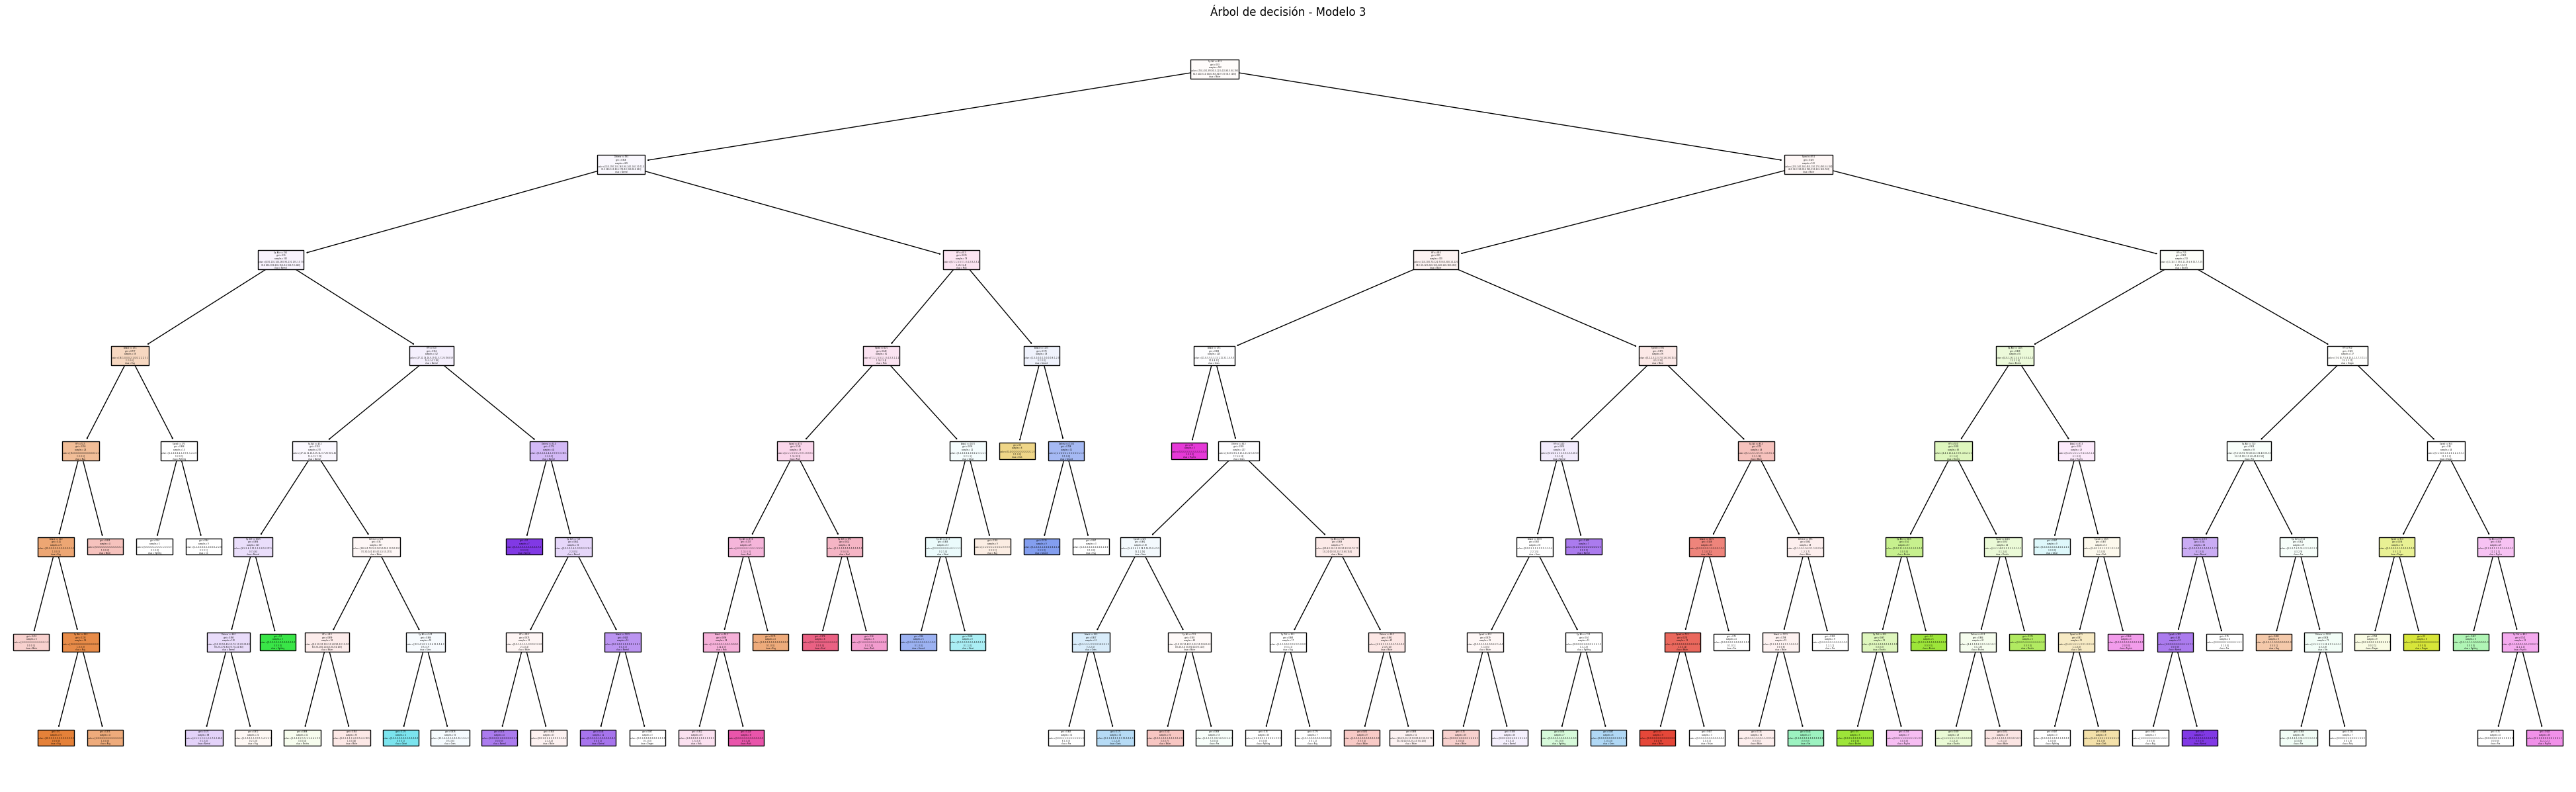

Accuracy: 0.1555
Precision: 0.1470
Recall: 0.1555




c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [179]:
# Diferentes modelos de árbol de decisión
for i, params in enumerate(parameters):
    print(f"Modelo {i+1} - Parámetros: {params}")
    clf = DecisionTreeClassifier(**params)
    clf.fit(X_train_pkm, y_train_pkm)
    
    # Grafico del árbol
    plt.figure(figsize=(50, 15))
    plot_tree(clf, feature_names=X_pkm.columns, class_names=sorted(y_pkm.unique()), filled=True)
    plt.title(f"Árbol de decisión - Modelo {i+1}")
    plt.show()
    
    # Evaluar el modelo en el conjunto de prueba
    y_pred_pkm = clf.predict(X_test_pkm)
    accuracy = accuracy_score(y_test_pkm, y_pred_pkm)
    precision = precision_score(y_test_pkm, y_pred_pkm, average='weighted')
    recall = recall_score(y_test_pkm, y_pred_pkm, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\n")

# Ejercicio 5

Realizar la estimación del atributo Type utilizando Bayes Ingenuo. Aquí deberá 
considerar un criterio de división de los atributos para discretizarlos. Mostrar los 
resultados sobre dos conjuntos de test (Precisión, Exhaustividad y Exactitud).

En este bloque de código, realizamos varias etapas para preprocesar los datos y entrenar un modelo Naive Bayes.

- **Discretización de Variables Numéricas**:
  - Se especifican las columnas numéricas que se van a discretizar.
  - Utilizamos `KBinsDiscretizer` para convertir las variables numéricas en categorías.
  - Se aplica el discretizador a las columnas numéricas del DataFrame.

- **División de Datos en Características y Etiquetas**:
  - Se separan las características (X) de la variable objetivo (y) del conjunto de datos.

- **Preprocesamiento para Variables Categóricas**:
  - Se define un `ColumnTransformer` que aplica `OneHotEncoder` a todas las columnas de características.

- **Creación del Pipeline**:
  - Se construye un `Pipeline` que encadena el preprocesamiento y el clasificador Naive Bayes multinomial.

- **Entrenamiento del Modelo**:
  - El pipeline se entrena con los datos de entrenamiento.

- **Predicciones y Evaluación del Modelo**:
  - Se realizan predicciones sobre los datos de prueba y se calculan métricas de precisión, exhaustividad y exactitud.

In [84]:
df_pkm

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,55,80,80,135,120,100
1186,Roaring Moon,Dragon,105,139,71,55,101,119
1187,Iron Valiant,Fairy,74,130,90,120,60,116
1188,Koraidon,Fighting,100,135,115,85,100,135


In [85]:
num_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'] # Columnas numéricas

# Discretización
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform') # Usamos KBinsDiscretizer para convertir las variables numéricas en categorías


df_pkm[num_cols] = discretizer.fit_transform(df_pkm[num_cols])# Aplicamos discretizador 

# Dividir los datos en características y etiquetas
X_bayes = df_pkm.drop('Type', axis=1)
y_bayes = df_pkm['Type']

# División de los datos en entrenamiento y prueba
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X_bayes, y_bayes, test_size=0.2, random_state=42)

In [88]:
# Preparamos el preprocesamiento para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('', OneHotEncoder(handle_unknown='ignore'), X.columns)  # Aplicar OneHot a todas las columnas
    ])

# Creamos el pipeline con preprocesamiento y clasificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

# Entrenamiento del modelo
pipeline.fit(X_train_bayes, y_train_bayes)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object'))])),
                ('classifier', MultinomialNB())])

In [89]:
# Predicciones
y_pred_bayes = pipeline.predict(X_test_bayes)

# Cálculo de métricas
precision = precision_score(y_test_bayes, y_pred_bayes, average='macro', zero_division=0)
recall = recall_score(y_test_bayes, y_pred_bayes, average='macro', zero_division=0)
accuracy = accuracy_score(y_test_bayes, y_pred_bayes)

print(f'Precisión: {precision}, Exhaustividad: {recall}, Exactitud: {accuracy}')


Precisión: 0.07187810749986917, Exhaustividad: 0.07693151179741219, Exactitud: 0.15966386554621848


c:\Users\Usuario\Documents\5TO CUATRIMESTRE\data_mining\DataMining-2\data_mining\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Ejercicio 6

Realizar la estimación del atributo Type utilizando k-NN analizando los parámetros 
cantidad de vecinos, métrica y valor de p. Mostrar los resultados sobre un conjunto de 
test (Precisión, Exhaustividad y Exactitud)

Aplicamos preprocesamiento a las características y etiquetas, y entrenamos un clasificador k-NN (vecinos más cercanos).

- **Valores Únicos de las Etiquetas**:
  - `unique_states_pkm = df_pkm['Type'].unique()`: Obtenemos los valores únicos de las etiquetas (tipos de Pokémon) en el conjunto de datos.

- **Preparación de Características y Etiquetas**:
  - `X_neigh` y `y_neigh`: Contienen características y etiquetas respectivamente, excluyendo la columna 'Type' que representa el tipo de Pokémon.
  
- **Identificación de Columnas Categóricas y Numéricas**:
  - `categorical_cols` y `numeric_cols`: Identifican las columnas categóricas y numéricas en el conjunto de características `X_neigh`.

- **ColumnTransformer**:
  - `preprocessor_neigh`: Utilizamos `ColumnTransformer` para aplicar preprocesamiento específico a las columnas numéricas y categóricas. Se estandarizan las variables numéricas y se aplica One-Hot Encoding a las variables categóricas.

- **División en Conjuntos de Entrenamiento y Prueba**:
  - Utilizamos `train_test_split` para dividir los datos en conjuntos de entrenamiento y prueba.

- **Pipeline con Preprocesamiento y Modelo k-NN**:
  - `pipeline_neigh`: Creamos un pipeline que incluye el preprocesamiento definido y el modelo k-NN con 5 vecinos más cercanos.

- **Entrenamiento del Modelo k-NN**:
  - `pipeline_neigh.fit(X_train_neigh, y_train_neigh)`: Entrenamos el modelo k-NN utilizando el conjunto de entrenamiento preprocesado.

- **Predicciones y Métricas de Rendimiento**:
  - Realizamos predicciones en el conjunto de prueba y calculamos métricas de precisión, exhaustividad y exactitud para evaluar el rendimiento del modelo.

Este proceso nos permite entrenar y evaluar un clasificador k-NN para predecir el tipo de Pokémon en función de sus características.

In [99]:
unique_states_pkm = df_pkm['Type'].unique()
unique_states_pkm

['Grass', 'Fire', 'Water', 'Bug', 'Normal', ..., 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying']
Length: 18
Categories (18, object): ['Bug', 'Dark', 'Dragon', 'Electric', ..., 'Psychic', 'Rock', 'Steel', 'Water']

In [103]:
# df_pkm
X_neigh = df_pkm.drop('Type', axis=1)
y_neigh = df_pkm['Type']

# Columnas categóricas y numéricas
categorical_cols = X_neigh.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_neigh.select_dtypes(include=['int64', 'float64']).columns

# ColumnTransformer
preprocessor_neigh = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Conjunto de entrenamiento y de prueba
X_train_neigh, X_test_neigh, y_train_neigh, y_test_neigh = train_test_split(X_neigh, y_neigh, test_size=0.2, random_state=42)

# Pipeline que incluye el preprocesamiento y el modelo k-NN
pipeline_neigh = Pipeline([
    ('preprocessor', preprocessor_neigh),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Entrenar el modelo
pipeline_neigh.fit(X_train_neigh, y_train_neigh)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Name'], dtype='object'))])),
                ('knn', KNeighborsClassifier())])

In [105]:
# Predicciones en el conjunto de prueba
y_pred_neigh = pipeline.predict(X_test_neigh)

# Métricas de rendimiento
precision = precision_score(y_test_neigh, y_pred_neigh, average='macro', zero_division=0)
recall = recall_score(y_test_neigh, y_pred_neigh, average='macro', zero_division=0)
accuracy = accuracy_score(y_test_neigh, y_pred_neigh)

print(f'Precisión: {precision}, Exhaustividad: {recall}, Exactitud: {accuracy}')

Precisión: 0.07187810749986917, Exhaustividad: 0.07693151179741219, Exactitud: 0.15966386554621848


# Ajuste de Hiperparametros

Para esta ultima seccion, utilizamos el algoritmo de vecinos más cercanos (k-NN) para clasificar las muestras de un conjunto de datos.

- **Label Encoding de las Etiquetas**:
  - Utilizamos `LabelEncoder` para convertir las etiquetas categóricas en valores numéricos, que son necesarios para el modelo k-NN.

- **Creación del Pipeline**:
  - Creamos un pipeline que incluye el preprocesamiento de características y el clasificador k-NN.
  - `preprocessor_neigh`: Preprocesamiento de características definido anteriormente.
  - `KNeighborsClassifier(n_neighbors=5)`: Clasificador k-NN con 5 vecinos cercanos.

- **Entrenamiento del Modelo**:
  - Entrenamos el pipeline utilizando las características y etiquetas de entrenamiento.

- **Predicciones con el Modelo**:
  - Utilizamos el modelo entrenado para predecir las etiquetas del conjunto de prueba.

- **Métricas de Rendimiento**:
  - Calculamos y mostramos las métricas de precisión, exhaustividad y exactitud en el conjunto de prueba.

- **Optimización de Hiperparámetros con Grid Search**:
  - Definimos un conjunto de hiperparámetros a probar para el modelo k-NN.
  - Utilizamos GridSearchCV para encontrar la combinación óptima de hiperparámetros mediante validación cruzada.

- **Mejor Modelo y Métricas de Rendimiento**:
  - Mostramos los mejores parámetros encontrados por Grid Search y la mejor puntuación de validación cruzada.
  - Evaluamos el mejor modelo en el conjunto de prueba y mostramos las métricas de rendimiento.

In [ ]:

label_encoder = LabelEncoder() # Encoder para las etiquetas

# Label Encoding a las etiquetas
y_train_encoded = label_encoder.fit_transform(y_train_neigh)
y_test_encoded = label_encoder.transform(y_test_neigh)

# Pipeline que incluye el preprocesamiento y el modelo k-NN
pipeline_neigh_encoded = Pipeline([
    ('preprocessor', preprocessor_neigh),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Entrenar el modelo con etiquetas codificadas
pipeline_neigh_encoded.fit(X_train_neigh, y_train_encoded)

# Predicciones con el modelo
y_pred_neigh = pipeline_neigh_encoded.predict(X_test_neigh)

# Convertimos las predicciones de vuelta a etiquetas categóricas para evaluación
y_pred_labels = label_encoder.inverse_transform(y_pred_neigh)

# Calculamos y mostramos las métricas de rendimiento con etiquetas categóricas
precision = precision_score(y_test_neigh, y_pred_labels, average='macro', zero_division=0)
recall = recall_score(y_test_neigh, y_pred_labels, average='macro', zero_division=0)
accuracy = accuracy_score(y_test_neigh, y_pred_labels)

print(f'Precisión en test: {precision:.3f}, Exhaustividad en test: {recall:.3f}, Exactitud en test: {accuracy:.3f}')


Precisión en test: 0.245, Exhaustividad en test: 0.163, Exactitud en test: 0.181


In [ ]:
# Parámetros a probar
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2]  
}

# GridSearchCV con etiquetas codificadas
grid_search = GridSearchCV(pipeline_neigh, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_neigh, y_train_encoded)  # Usar etiquetas codificadas para el entrenamiento

# Evaluar el modelo 
best_model = grid_search.best_estimator_
y_pred_neigh = best_model.predict(X_test_neigh)
y_pred_labels = label_encoder.inverse_transform(y_pred_neigh)

# Calcular métricas 
precision = precision_score(y_test_neigh, y_pred_labels, average='macro', zero_division=0)
recall = recall_score(y_test_neigh, y_pred_labels, average='macro', zero_division=0)
accuracy = accuracy_score(y_test_neigh, y_pred_labels)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
# Mejores parámetros y la mejor puntuación de validación cruzada
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada: {:.3f}".format(grid_search.best_score_))

# Métricas de rendimiento en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_neigh = best_model.predict(X_test_neigh)
precision = precision_score(y_test_neigh, y_pred_labels, average='macro', zero_division=0)
recall = recall_score(y_test_neigh, y_pred_labels, average='macro', zero_division=0)
accuracy = accuracy_score(y_test_neigh, y_pred_labels)
print(f'Precisión en test: {precision:.3f}, Exhaustividad en test: {recall:.3f}, Exactitud en test: {accuracy:.3f}')


Mejores parámetros encontrados: {'knn__metric': 'euclidean', 'knn__n_neighbors': 10, 'knn__p': 1}
Mejor puntuación de validación cruzada: 0.183
Precisión en test: 0.095, Exhaustividad en test: 0.105, Exactitud en test: 0.134
